<a href="https://colab.research.google.com/github/woukl22/MachineLearningStudy_PythonMachineLearning3rdEd/blob/main/3.3.4_LogisticRegressionGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3.4 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

#### - **로지스틱 회귀 구현**

In [ ]:
# 로지스틱 회귀를 구현하려면 아달린 구현에서 비용 함수 J를 새로운 비용 함수로 바꾸기만 하면 된다.

class LogisticRegressionGD(object):
  """경사 하강법을 사용한 로지스틱 회귀 분류기

  매개변수
  ----------
  eta : float
    학습률 (0.0과 1.0 사이)
  n_iter: int
    훈련 데이터셋 반복 횟수
  random_state : int
    가중치 무작위 초기화를 위한 난수 생성기 시드

  속성
  ---------
  w_ : 1d-array
    학습된 가중치
  cost_ : list
    에프코마다 누적된 로지스틱 비용 함수 값

  """
  def __init__(self, eta=0.05, n_iter=100, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """훈련 데이터 학습

    매개변수
    ----------
    X : {array-like}, shape = [n_samples, n_features]
      n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    y : array-like, shape = [n_samples]
      타깃 값

    반환값
    --------
    self : object

    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()

      # 제곱 오차합 대신 로지스틱 비용을 계산합니다
      cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1 - output))))
      self.cost_.append(cost)
    return self
  
  def net_input(self, X):
    """최종 입력 계산"""
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def activation(self, z):
    """로지스틱 시그모이드 활성화 계산"""
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
  
  def predict(self, X):
    """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
    return np.where(self.net_input(X) >= 0.0, 1, 0)
    # 다음과 동일합니다
    # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

직접 구현한 로지스틱 모델은 이진 분류 모델에만 적용할 수 있다.<br><br>

#### - **로지스틱 모델이 만든 결정 경계**

*(Iris-setosa와 Iris-versicolor 붓꽃 분류)*

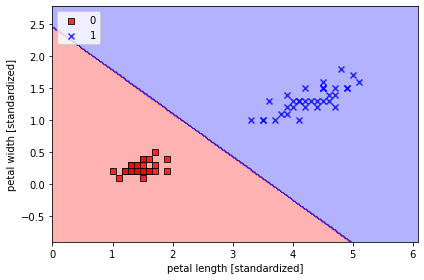

In [ ]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()